In [ ]:
Лупу Яна БУТ2001
Лабораторная работа 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [ ]:
# 1. Чтение файла, проверка корректности считывания файла, методы .info, describe

data = pd.read_excel("data1.xlsx")
data.drop(data.columns[data.columns.str.contains('Unnamed', na=False)], axis=1, inplace=True)
print(data.head())  # Просмотр первых нескольких строк
print(data.info())  # Общая информация о датасете
print(data.describe())  # Описательная статистика
print(data)

  Model Yr Division            Carline Trans in FE Guide Trans Desc  \
0     2020     Fiat                500               NaN        NaN   
1     2020     Fiat                500               NaN        NaN   
2  2022(B)    Smart                 #1               NaN        NaN   
3     2011      BMW  1 Series Active E          Auto(A1)  Automatic   
4  2019(B)       DS       3 Crossback                NaN        NaN   

  Trans, Other  Тип привода (1-передний, 2-задний, 3-полный)  \
0          NaN                                             1   
1          NaN                                             1   
2          NaN                                             2   
3          NaN                                             2   
4          NaN                                             1   

   City FE (kWh-h/100km)  Hwy FE (kWh-h/100km)  Comb FE (kWh-h/100km) EPA  \
0                    NaN                   NaN                  15.536842   
1                    NaN          

In [ ]:
# 2,3. Замена пустых значений в столбцах на 'Unknown' и 0

import pandas as pd

# Замена пропущенных значений нулями для числовых признаков
data_numeric = data.select_dtypes(include=['float', 'int'])
data[data_numeric.columns] = data_numeric.fillna(0)

# Замена пропущенных значений на 'Unknown' для категориальных признаков
data_categorical = data.select_dtypes(include=['object'])
data[data_categorical.columns] = data_categorical.fillna('Unknown')

# Вывод обработанных данных
print(data)


    Model Yr Division            Carline Trans in FE Guide Trans Desc  \
0       2020     Fiat                500           Unknown    Unknown   
1       2020     Fiat                500           Unknown    Unknown   
2    2022(B)    Smart                 #1           Unknown    Unknown   
3       2011      BMW  1 Series Active E          Auto(A1)  Automatic   
4    2019(B)       DS       3 Crossback            Unknown    Unknown   
..       ...      ...                ...               ...        ...   
412     2017  Renault           Zoe 2017           Unknown    Unknown   
413     2019  Renault           Zoe 2018           Unknown    Unknown   
414     2019  Renault           Zoe 2019           Unknown    Unknown   
415     2019       MG           ZS EV LR           Unknown    Unknown   
416     2019       MG           ZS EV SR           Unknown    Unknown   

    Trans, Other  Тип привода (1-передний, 2-задний, 3-полный)  \
0        Unknown                                         

In [ ]:
# 4. кодирование категориальных признаков методом Label Encoding
from sklearn.preprocessing import LabelEncoder

# Выбираем все столбцы с типом данных object
categorical_columns = data.select_dtypes(include=['object']).columns

# Приводим значения в столбцах к строковому типу
for column in categorical_columns:
    data[column] = data[column].astype(str)

# Создаем экземпляр LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder ко всем категориальным столбцам
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Выбираем только столбцы, которые были закодированы с помощью LabelEncoder
encoded_categorical_columns = [column for column in categorical_columns if column in data.columns]

# Кодирование категориальных признаков методом One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(data, columns=encoded_categorical_columns)

print("Результат Label Encoding:")
print(data)

print("\nРезультат One-Hot Encoding:")
print(one_hot_encoded_data)

Результат Label Encoding:
     Model Yr  Division  Carline  Trans in FE Guide  Trans Desc  Trans, Other  \
0           9        17        4                  3           2             7   
1          60        17        4                  3           2             7   
2          72        59        0                  3           2             7   
3          12         2        1                  0           0             7   
4          55        14        2                  3           2             7   
..        ...       ...      ...                ...         ...           ...   
412         6        57      257                  3           2             7   
413        53        57      258                  3           2             7   
414         7        57      259                  3           2             7   
415        53        40      253                  3           2             7   
416        53        40      254                  3           2             7   

 

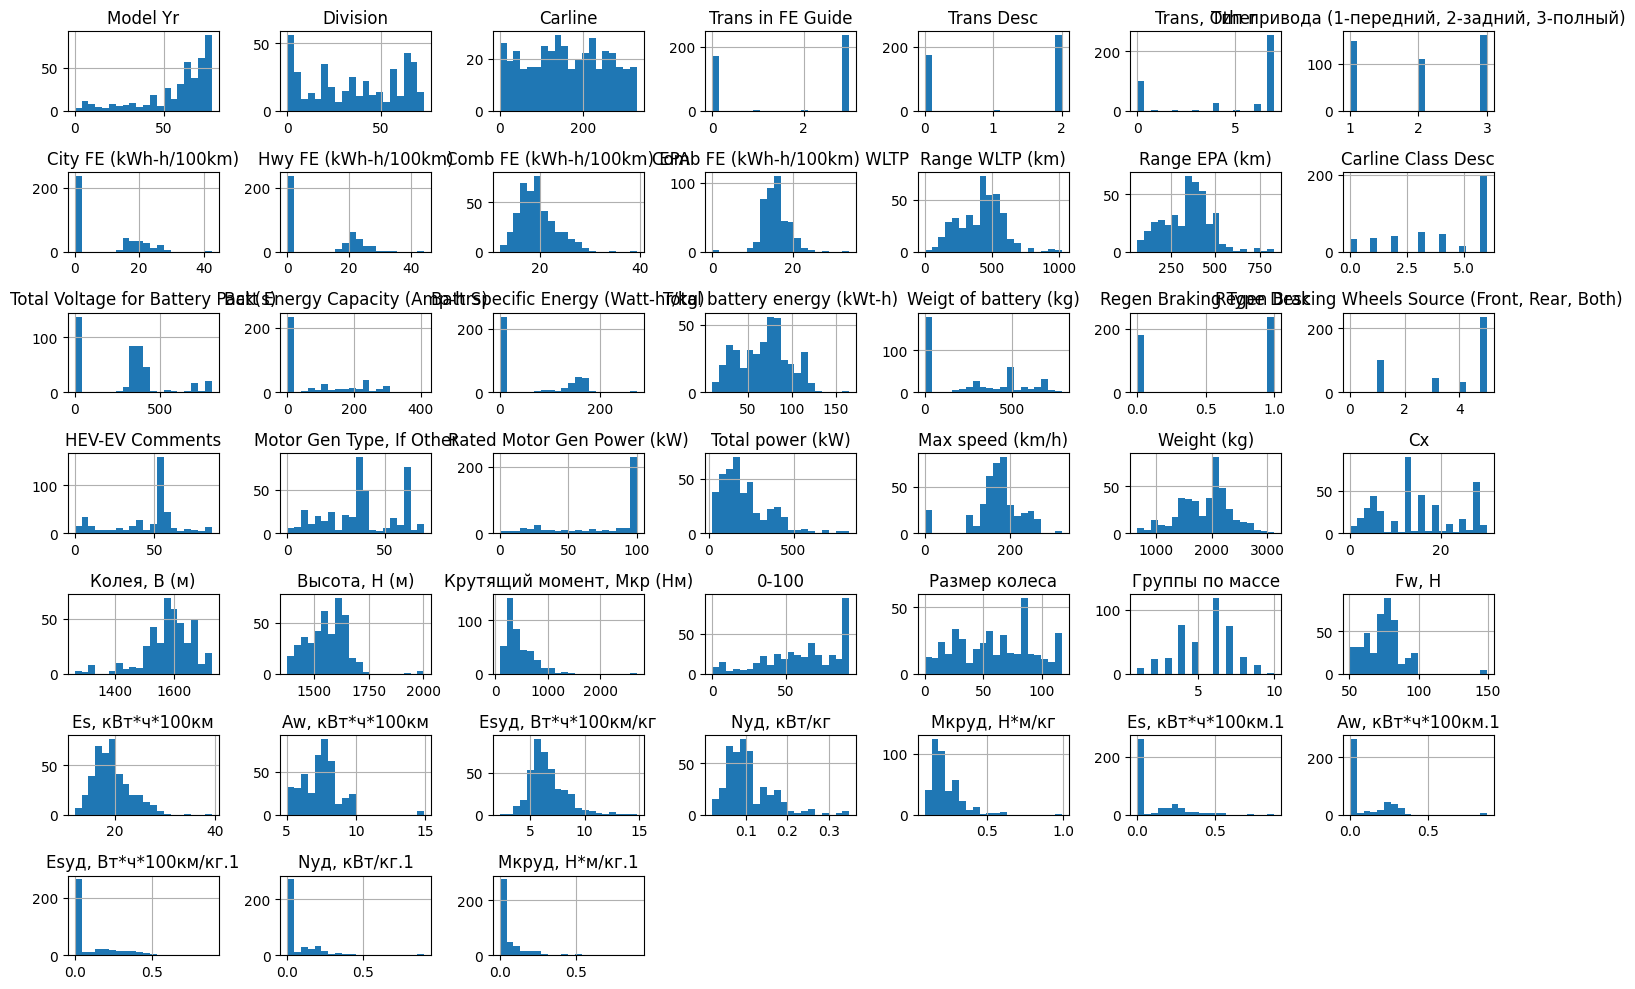

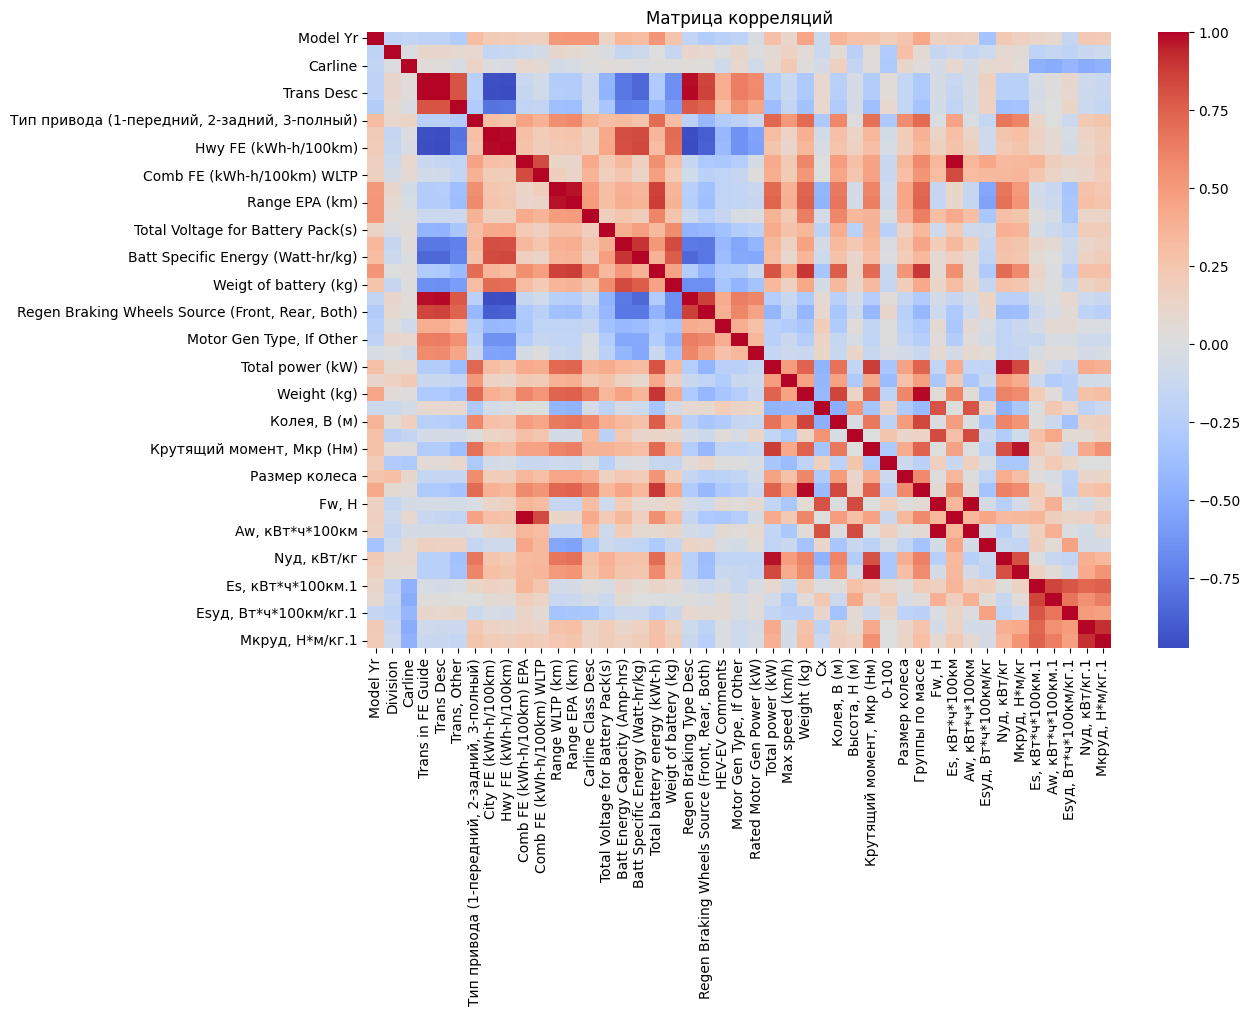

In [ ]:
# 5. Визуализация данных
# Гистограмма распределений
data.hist(figsize=(15, 10), bins=20)
plt.tight_layout()  # для корректного отображения текста
plt.title('Гистограмма')
plt.show()

# Матрица корреляций
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()



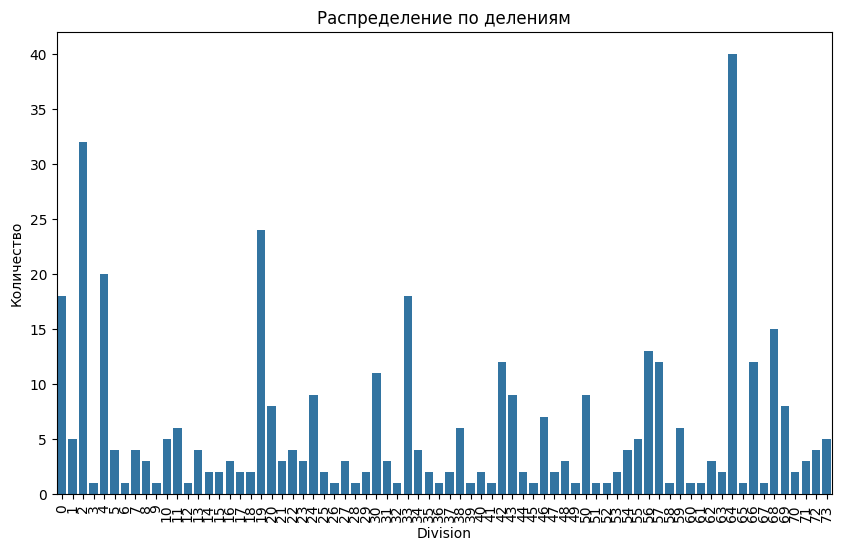

In [ ]:
# Построение столбчатой диаграммы для категориального признака
plt.figure(figsize=(10, 6))
sns.countplot(x='Division', data=data)
plt.title('Распределение по делениям')
plt.xlabel('Division')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()


In [ ]:

#Создание матрицы корреляций
correlation_matrix = data.corr()

# Добавление целевой переменной к матрице корреляций
correlation_with_target = correlation_matrix['Esуд, Вт*ч*100км/кг.1']

# Вывод корреляции каждого признака с целевой переменной
print(correlation_with_target)



Model Yr                                          -0.146997
Division                                          -0.188339
Carline                                           -0.430699
Trans in FE Guide                                  0.101586
Trans Desc                                         0.090546
Trans, Other                                       0.114127
Тип привода (1-передний, 2-задний, 3-полный)      -0.111025
City FE (kWh-h/100km)                             -0.037279
Hwy FE (kWh-h/100km)                              -0.053310
Comb FE (kWh-h/100km) EPA                          0.128546
Comb FE (kWh-h/100km) WLTP                         0.060009
Range WLTP (km)                                   -0.335984
Range EPA (km)                                    -0.321828
Carline Class Desc                                -0.304343
Total Voltage for Battery Pack(s)                 -0.180347
Batt Energy Capacity (Amp-hrs)                    -0.102655
Batt Specific Energy (Watt-hr/kg)       

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

# Разбиение набора данных на X и y (по столбцам) и на train и test по строкам
X = data.drop(columns=['Esуд, Вт*ч*100км/кг.1'])  # Матрица признаков
y = data['Esуд, Вт*ч*100км/кг.1']  # Целевая переменная

# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование числовых значений y_train в метки классов
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Отбор признаков: удаление признаков с низкой дисперсией
selector_variance = VarianceThreshold(threshold=0.01)  # Установите порог по вашему усмотрению
X_train_selected_variance = selector_variance.fit_transform(X_train)
X_test_selected_variance = selector_variance.transform(X_test)

# Отбор признаков: одномерный отбор признаков
selector_univariate = SelectKBest(chi2, k=10)  # Выберите количество признаков (k) по вашему усмотрению
X_train_selected_univariate = selector_univariate.fit_transform(X_train_selected_variance, y_train_encoded)
X_test_selected_univariate = selector_univariate.transform(X_test_selected_variance)

# Отбор признаков: рекурсивное исключение признаков (RFE)
estimator_rfe = RandomForestClassifier(n_estimators=10)  # Используйте любую модель по вашему выбору
rfe_selector = RFE(estimator_rfe, n_features_to_select=10, step=1)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected_univariate, y_train_encoded)
X_test_selected_rfe = rfe_selector.transform(X_test_selected_univariate)

# Получение индексов отобранных признаков
selected_feature_indices = np.where(rfe_selector.support_)[0]

# Получение списка отобранных признаков
selected_features_rfe = X.columns[selected_feature_indices]

# Вывод отобранных признаков
print("Отобранные признаки:")
print(selected_features_rfe.tolist())


Отобранные признаки:
['Model Yr', 'Division', 'Carline', 'Trans in FE Guide', 'Trans Desc', 'Trans, Other', 'Тип привода (1-передний, 2-задний, 3-полный)', 'City FE (kWh-h/100km)', 'Hwy FE (kWh-h/100km)', 'Comb FE (kWh-h/100km) EPA']


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#8. Разбиение на X и y
X = data.drop(columns=['Esуд, Вт*ч*100км/кг.1'])  # Матрица признаков
y = data['Esуд, Вт*ч*100км/кг.1']  # Целевая переменная

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9.Нормализация данных
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("Размеры обучающего набора (X_train):", X_train.shape)
print("Размеры тестового набора (X_test):", X_test.shape)
print("Размеры обучающего набора (y_train):", y_train.shape)
print("Размеры тестового набора (y_test):", y_test.shape)
print("Примеры нормализованных признаков в обуч наборе :", X_train_normalized[:5])
print("Примеры нормализованных признаков в тестовом наборе :", X_test_normalized[:5])


Размеры обучающего набора (X_train): (333, 44)
Размеры тестового набора (X_test): (84, 44)
Размеры обучающего набора (y_train): (333,)
Размеры тестового набора (y_test): (84,)
Примеры нормализованных признаков в обуч наборе : [[-0.88696172  1.22375482  0.19618492 -1.13716426 -1.12659324 -1.67804918
  -0.05645223  1.21633393  0.95537763 -0.21997693 -0.17592184  0.41553633
   0.40374115 -0.07992886  0.02200411 -0.78491029 -0.86027064  0.22279023
  -1.05085175 -1.11803399  0.18398725  0.37061565 -1.21447017  0.07600114
   0.15131949  1.06448133  0.30189016 -1.20666568  0.92396396 -1.31652067
  -0.04059309 -0.29808675  0.72157626  0.30960446 -1.09958783 -0.21997693
  -1.09958783 -0.12897558  0.19452657 -0.08933906 -0.64223906 -0.61673147
  -0.55942449 -0.51868986]
 [ 0.36345247  0.88769845  0.81229413  0.89145555  0.89580864  0.68970665
   1.1184598  -0.86720104 -0.87797585  1.41389644  1.40524262  0.21718964
   0.20056889 -0.07992886  2.18653413 -0.78491029 -0.86027064  0.86922938
  -1.05

Лабораторная работа 2

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
!pip install catboost                               #(запускается один раз)
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV



# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Метод 1: K-ближайших соседей
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Метод 2: Дерево решений
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Метод 3: Случайный лес
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Метод 4: Градиентный бустинг (CatBoost)
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train, verbose=False)  # Отключение вывода прогресса обучения

# Метод 5: Нейронные сети
mlp_model = MLPRegressor()
mlp_model.fit(X_train, y_train)

# Оценка производительности моделей
knn_score = knn_model.score(X_test, y_test)
dt_score = dt_model.score(X_test, y_test)
rf_score = rf_model.score(X_test, y_test)
catboost_score = catboost_model.score(X_test, y_test)
mlp_score = mlp_model.score(X_test, y_test)

print("K-ближайших соседей:", knn_score)
print("Дерево решений:", dt_score)
print("Случайный лес:", rf_score)
print("Градиентный бустинг (CatBoost):", catboost_score)
print("Нейронные сети:", mlp_score)

# Изучение регулируемых параметров каждого метода
# для K-ближайших соседей
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn_model, knn_params)
knn_grid.fit(X_train, y_train)
best_knn_params = knn_grid.best_params_
print("Лучшие параметры для K-ближайших соседей:", best_knn_params)

# для Дерева решений
dt_params = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(dt_model, dt_params)
dt_grid.fit(X_train, y_train)
best_dt_params = dt_grid.best_params_
print("Лучшие параметры для Дерева решений:", best_dt_params)

# для Случайного леса
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_grid = GridSearchCV(rf_model, rf_params)
rf_grid.fit(X_train, y_train)
best_rf_params = rf_grid.best_params_
print("Лучшие параметры для Случайного леса:", best_rf_params)

# для Градиентного бустинга (CatBoost)
catboost_params = {'iterations': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.5]}
catboost_grid = GridSearchCV(catboost_model, catboost_params)
catboost_grid.fit(X_train, y_train)
best_catboost_params = catboost_grid.best_params_
print("Лучшие параметры для Градиентного бустинга (CatBoost):", best_catboost_params)

# для Нейронных сетей
mlp_params = {'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)], 'activation': ['relu', 'tanh', 'logistic']}
mlp_grid = GridSearchCV(mlp_model, mlp_params)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
print("Лучшие параметры для Нейронных сетей:", best_mlp_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


K-ближайших соседей: 0.26879351454053624
Дерево решений: 0.9984564748992427
Случайный лес: 0.9983083785917174
Градиентный бустинг (CatBoost): 0.9883158905987334
Нейронные сети: -6558.788139645724
Лучшие параметры для K-ближайших соседей: {'n_neighbors': 3}
Лучшие параметры для Дерева решений: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Лучшие параметры для Случайного леса: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0:	learn: 0.1564040	total: 5.02ms	remaining: 45.2ms
1:	learn: 0.1553008	total: 9.58ms	remaining: 38.3ms
2:	learn: 0.1542209	total: 14.3ms	remaining: 33.4ms
3:	learn: 0.1532820	total: 18.6ms	remaining: 27.9ms
4:	learn: 0.1522759	total: 23.2ms	remaining: 23.2ms
5:	learn: 0.1512841	total: 27.6ms	remaining: 18.4ms
6:	learn: 0.1503649	total: 32ms	remaining: 13.7ms
7:	learn: 0.1494547	total: 36.5ms	remaining: 9.11ms
8:	learn: 0.1483870	total: 41.1ms	remaining: 4.56ms
9:	learn: 0.1476205	total: 45.4ms	remaining: 0us
0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Лучшие параметры для Нейронных сетей: {'activation': 'logistic', 'hidden_layer_sizes': (100, 50, 100)}


ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ НЕЙРОННЫХ СЕТЕЙ С ПОМОЩЬЮ МЕТОДА КРОСС-ВАЛИДАЦИИ
Применение параметров для нейронных сетей (MLPRegressor) осуществляется через конвейер (pipeline) в GridSearchCV.

In [30]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Определение конвейера для нормализации данных и обучения нейронной сети
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Нормализация данных
    ('mlp', MLPRegressor())  # Нейронная сеть
])

# Определение сетки параметров для подбора
parameters = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],  # Разные архитектуры сети
    'mlp__activation': ['relu', 'tanh', 'logistic'],  # Разные функции активации
    'mlp__alpha': [0.0001, 0.001, 0.01],  # Параметр регуляризации
    'mlp__learning_rate_init': [0.001, 0.01, 0.1]  # Скорость обучения
}

# Создание объекта GridSearchCV для подбора параметров
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с подбором параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка (MSE):", -grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Лучшие параметры: {'mlp__activation': 'relu', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (100, 50, 100), 'mlp__learning_rate_init': 0.01}
Лучшая оценка (MSE): 0.0012229929113326547


Лабораторная работа №3

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Метод 1: K-ближайших соседей
knn_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_pred)

print("K-ближайших соседей:")
print("MAE:", knn_mae)
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("R2-score:", knn_r2)

# Метод 2: Дерево решений
dt_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

print("Дерево решений:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2-score:", dt_r2)

# Метод 3: Случайный лес
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("Случайный лес:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2-score:", rf_r2)

# Метод 4: Градиентный бустинг (CatBoost)
catboost_pred = catboost_model.predict(X_test)
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_mse = mean_squared_error(y_test, catboost_pred)
catboost_rmse = np.sqrt(catboost_mse)
catboost_r2 = r2_score(y_test, catboost_pred)

print("Градиентный бустинг (CatBoost):")
print("MAE:", catboost_mae)
print("MSE:", catboost_mse)
print("RMSE:", catboost_rmse)
print("R2-score:", catboost_r2)

# Метод 5: Нейронные сети
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Получение лучшей обученной модели из grid_search
best_model = grid_search.best_estimator_

# Прогноз для тестовых данных с использованием лучшей модели
mlp_pred = best_model.predict(X_test)

# Вычисление метрик качества
mlp_mae = mean_absolute_error(y_test, mlp_pred)
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_rmse = np.sqrt(mlp_mse)
mlp_r2 = r2_score(y_test, mlp_pred)

# Вывод результатов
print("Нейронная сеть (с использованием GridSearchCV):")
print("MAE:", mlp_mae)
print("MSE:", mlp_mse)
print("RMSE:", mlp_rmse)
print("R2-score:", mlp_r2)


K-ближайших соседей:
MAE: 0.0707410331241408
MSE: 0.014106180924305952
RMSE: 0.11876944440514131
R2-score: 0.26879351454053624
Дерево решений:
MAE: 0.0025460810994866368
MSE: 2.9777148815643574e-05
RMSE: 0.005456844217644808
R2-score: 0.9984564748992427
Случайный лес:
MAE: 0.002319772214308661
MSE: 3.263417121590402e-05
RMSE: 0.005712632599415441
R2-score: 0.9983083785917174
Градиентный бустинг (CatBoost):
MAE: 0.0082139258828783
MSE: 0.0002254057703687978
RMSE: 0.015013519586319453
R2-score: 0.9883158905987334
Нейронная сеть (с использованием GridSearchCV):
MAE: 0.02366778339694996
MSE: 0.0012031324183240453
RMSE: 0.03468619924875087
R2-score: 0.9376345566623764


лабораторарная 4

In [67]:
# Вывод обучающего набора данных до удаления столбцов
print("Обучающий набор данных до удаления столбцов:")
print(X_train)  # Вывод первых нескольких строк обучающего набора данных

# Удаляем пару столбцов из обучающего набора данных
X_train_modified = X_train.drop(columns=['Мкруд, Н*м/кг.1', 'City FE (kWh-h/100km)'])

# Разделение на тестовый и обучающий наборы
X_train_modified, X_test_modified, y_train, y_test = train_test_split(X_train_modified, y_train, test_size=0.2, random_state=42)


Обучающий набор данных до удаления столбцов:
     Model Yr  Division  Carline  Trans in FE Guide  Trans Desc  Trans, Other  \
286        41        64      179                  0           0             0   
386        65        56      235                  3           2             7   
209        76        24      133                  0           0             6   
93         75        43       50                  0           0             0   
284        31        64      321                  3           2             7   
..        ...       ...      ...                ...         ...           ...   
71         76        36       78                  0           0             0   
106        75         0      272                  0           0             4   
270        64        64      169                  0           0             0   
348        70        54      208                  3           2             7   
102        75         0      270                  1           0 

In [68]:
# 1. Дерево решений
dt_model_modified = DecisionTreeRegressor()  # Инициализация модели
dt_model_modified.fit(X_train_modified, y_train)  # Обучение модели на новом обучающем наборе

# 2. K-ближайших соседей
knn_model_modified = KNeighborsRegressor()  # Инициализация модели
knn_model_modified.fit(X_train_modified, y_train)  # Обучение модели на новом обучающем наборе

# 3. Случайный лес
rf_model_modified = RandomForestRegressor()  # Инициализация модели
rf_model_modified.fit(X_train_modified, y_train)  # Обучение модели на новом обучающем наборе

# 4. Градиентный бустинг (CatBoost)
catboost_model_modified = CatBoostRegressor()  # Инициализация модели
catboost_model_modified.fit(X_train_modified, y_train)  # Обучение модели на новом обучающем наборе

# 5. Нейронные сети
mlp_model_modified = MLPRegressor()  # Инициализация модели
mlp_model_modified.fit(X_train_modified, y_train)  # Обучение модели на новом обучающем наборе




Learning rate set to 0.033213
0:	learn: 0.1614318	total: 14.1ms	remaining: 14.1s
1:	learn: 0.1579955	total: 23.9ms	remaining: 11.9s
2:	learn: 0.1545806	total: 33.2ms	remaining: 11s
3:	learn: 0.1510217	total: 45.9ms	remaining: 11.4s
4:	learn: 0.1479580	total: 54.7ms	remaining: 10.9s
5:	learn: 0.1448827	total: 64.7ms	remaining: 10.7s
6:	learn: 0.1421003	total: 69.3ms	remaining: 9.83s
7:	learn: 0.1391888	total: 76.4ms	remaining: 9.47s
8:	learn: 0.1358395	total: 81.7ms	remaining: 8.99s
9:	learn: 0.1330750	total: 88.4ms	remaining: 8.75s
10:	learn: 0.1305948	total: 94.3ms	remaining: 8.48s
11:	learn: 0.1275845	total: 99.2ms	remaining: 8.17s
12:	learn: 0.1251456	total: 105ms	remaining: 7.96s
13:	learn: 0.1224740	total: 111ms	remaining: 7.79s
14:	learn: 0.1199382	total: 116ms	remaining: 7.62s
15:	learn: 0.1177149	total: 121ms	remaining: 7.46s
16:	learn: 0.1151900	total: 130ms	remaining: 7.5s
17:	learn: 0.1126032	total: 140ms	remaining: 7.63s
18:	learn: 0.1104669	total: 145ms	remaining: 7.46s
19

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

оценка качества прогноза:

до изменения:

In [69]:
print("K-ближайших соседей:")
print("MAE:", knn_mae)
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("R2-score:", knn_r2)

# Метод 2: Дерево решений

print("Дерево решений:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2-score:", dt_r2)

# Метод 3: Случайный лес
print("Случайный лес:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2-score:", rf_r2)

# Метод 4: Градиентный бустинг (CatBoost)

print("Градиентный бустинг (CatBoost):")
print("MAE:", catboost_mae)
print("MSE:", catboost_mse)
print("RMSE:", catboost_rmse)
print("R2-score:", catboost_r2)

K-ближайших соседей:
MAE: 0.0707410331241408
MSE: 0.014106180924305952
RMSE: 0.11876944440514131
R2-score: 0.26879351454053624
Дерево решений:
MAE: 0.0025460810994866368
MSE: 2.9777148815643574e-05
RMSE: 0.005456844217644808
R2-score: 0.9984564748992427
Случайный лес:
MAE: 0.002319772214308661
MSE: 3.263417121590402e-05
RMSE: 0.005712632599415441
R2-score: 0.9983083785917174
Градиентный бустинг (CatBoost):
MAE: 0.0082139258828783
MSE: 0.0002254057703687978
RMSE: 0.015013519586319453
R2-score: 0.9883158905987334


после:

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Дерево решений
dt_pred_modified = dt_model_modified.predict(X_test_modified)
dt_mae_modified = mean_absolute_error(y_test, dt_pred_modified)
dt_mse_modified = mean_squared_error(y_test, dt_pred_modified)
dt_rmse_modified = np.sqrt(dt_mse_modified)
dt_r2_modified = r2_score(y_test, dt_pred_modified)


print("Дерево решений:")
print("MAE:", dt_mae_modified)
print("MSE:", dt_mse_modified)
print("RMSE:", dt_rmse_modified)
print("R2-score:", dt_r2_modified)

# 2. K-ближайших соседей
knn_pred_modified = knn_model_modified.predict(X_test_modified)
knn_mae_modified = mean_absolute_error(y_test, knn_pred_modified)
knn_mse_modified = mean_squared_error(y_test, knn_pred_modified)
knn_rmse_modified = np.sqrt(knn_mse_modified)
knn_r2_modified = r2_score(y_test, knn_pred_modified)

print("K-ближайших соседей:")
print("MAE:", knn_mae_modified)
print("MSE:", knn_mse_modified)
print("RMSE:", knn_rmse_modified)
print("R2-score:", knn_r2_modified)

# 3. Случайный лес
rf_pred_modified = rf_model_modified.predict(X_test_modified)
rf_mae_modified = mean_absolute_error(y_test, rf_pred_modified)
rf_mse_modified = mean_squared_error(y_test, rf_pred_modified)
rf_rmse_modified = np.sqrt(rf_mse_modified)
rf_r2_modified = r2_score(y_test, rf_pred_modified)

print("Случайный лес:")
print("MAE:", rf_mae_modified)
print("MSE:", rf_mse_modified)
print("RMSE:", rf_rmse_modified)
print("R2-score:", rf_r2_modified)

# 4. Градиентный бустинг (CatBoost)
catboost_pred_modified = catboost_model_modified.predict(X_test_modified)
catboost_mae_modified = mean_absolute_error(y_test, catboost_pred_modified)
catboost_mse_modified = mean_squared_error(y_test, catboost_pred_modified)
catboost_rmse_modified = np.sqrt(catboost_mse_modified)
catboost_r2_modified = r2_score(y_test, catboost_pred_modified)

print("Градиентный бустинг (CatBoost):")
print("MAE:", catboost_mae_modified)
print("MSE:", catboost_mse_modified)
print("RMSE:", catboost_rmse_modified)
print("R2-score:", catboost_r2_modified)

# 5. Нейронные сети
mlp_pred_modified = mlp_model_modified.predict(X_test_modified)
mlp_mae_modified = mean_absolute_error(y_test, mlp_pred_modified)
mlp_mse_modified = mean_squared_error(y_test, mlp_pred_modified)
mlp_rmse_modified = np.sqrt(mlp_mse_modified)
mlp_r2_modified = r2_score(y_test, mlp_pred_modified)

print("Нейронные сети:")
print("MAE:", mlp_mae_modified)
print("MSE:", mlp_mse_modified)
print("RMSE:", mlp_rmse_modified)
print("R2-score:", mlp_r2_modified)


Дерево решений:
MAE: 0.003105547021609792
MSE: 5.391076565881308e-05
RMSE: 0.007342395090078787
R2-score: 0.9972877615852838
K-ближайших соседей:
MAE: 0.059920608739370725
MSE: 0.009006894522284377
RMSE: 0.09490466017158682
R2-score: 0.5468651757750833
Случайный лес:
MAE: 0.0028256125668012977
MSE: 3.902665784382289e-05
RMSE: 0.006247131969457895
R2-score: 0.9980365776796438
Градиентный бустинг (CatBoost):
MAE: 0.008281839862347085
MSE: 0.00022737159199266515
RMSE: 0.015078845844184003
R2-score: 0.9885609866845421
Нейронные сети:
MAE: 9.340590877554835
MSE: 144.85825985708482
RMSE: 12.035707700716431
R2-score: -7286.786257012741


In [84]:
# Сравнение производительности моделей
best_model = None
best_score = 0
for model, score in [(knn_model, knn_score), (dt_model, dt_score), (rf_model, rf_score), (catboost_model, catboost_score), (mlp_model, mlp_score)]:
    if score > best_score:
        best_model = model
        best_score = score
print("Наиболее эффективная модель:", best_model)

best_model2 = None
best_score2 = 0
for model, score in [(knn_model_modified, knn_r2_modified), (dt_model_modified, dt_r2_modified), (rf_model_modified, rf_r2_modified), (catboost_model_modified, catboost_r2_modified), (mlp_model_modified, mlp_r2_modified)]:
    if score > best_score2:
        best_model2 = model
        best_score2 = score
print("Наиболее эффективная модель:", best_model)

Наиболее эффективная модель: DecisionTreeRegressor()
Наиболее эффективная модель: DecisionTreeRegressor()
